In [165]:
# To load the library
import src.rmf_tool as rmf

import importlib
importlib.reload(rmf)

# To plot the results 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [166]:
# This code creates an object that represents a "density dependent population process"
ddpp = rmf.DDPP() 
# We then add the three transitions : 
DIMENSION=2
if (DIMENSION==3):
    ddpp.add_transition([-1,1,0],lambda x:x[0]+2*x[0]*x[1])
    ddpp.add_transition([0,-1,1],lambda x:x[1])
    ddpp.add_transition([1,0,-1],lambda x:3*(1-x[0]-x[1]))
    ddpp.set_initial_state([.3,.2,.5]) # We first need to define an initial stater
else:
    ddpp.add_transition([-1,1],lambda x:x[0]+2*x[0]*x[1])
    ddpp.add_transition([0,-1],lambda x:x[1])
    ddpp.add_transition([1,0,],lambda x:3*(1-x[0]-x[1]))
    ddpp.set_initial_state([.3,.2]) # We first need to define an initial stater
    



In [171]:
#pi,V,A,_= ddpp.meanFieldExapansionSteadyState(order=2)
#pi,V2,A,_= ddpp2.meanFieldExapansionSteadyState(order=2)
# V,V2

V = ddpp.theoreticalV_new()
pi,V,(V2,W) = ddpp.meanFieldExapansionSteadyState(order=1)
pi,V,A,(V2,W,A2,B,C,D) = ddpp.meanFieldExapansionSteadyState(order=2)
Ass = A
Vss = V
V,np.array([ 0.15875529, -0.11906646, -0.03968882]), W, np.array([[ 0.24324473, -0.19544478],
        [-0.19544478,  0.29785822]]), A

*** NOT TESTED!!! ***
rank= 2 (2, 2, 2, 2) (2, 2, 2, 2, 2) (2, 2, 2) (2, 2, 2, 2) (2, 2, 2)


(array([ 0.15875529, -0.11906646]),
 array([ 0.15875529, -0.11906646, -0.03968882]),
 array([[ 0.24324473, -0.19544478],
        [-0.19544478,  0.29785822]]),
 array([[ 0.24324473, -0.19544478],
        [-0.19544478,  0.29785822]]),
 array([-0.07551742,  0.05663807]))

time to compute drift= 0.05855607986450195


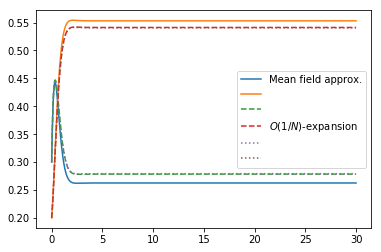

In [173]:
n=DIMENSION
T,XVWABCD=ddpp.meanFieldExapansionTransient(order=2,time=30)
X = XVWABCD[:,0:n]
V = XVWABCD[:,n:2*n]
A = XVWABCD[:,2*n+n**2:3*n+n**2]

N=10
plt.figure()
plt.plot(T,X,'-')
plt.plot(T,X+V/N,'--')
plt.plot(T,X+V/N+A/N**2,':')
plt.legend(['Mean field approx.','','','$O(1/N)$-expansion','','','$O(1/N^2)$-expansion'])

In [174]:
V[-1,:],Vss, A[-1,:], Ass

(array([ 0.15875528, -0.11906646]),
 array([ 0.15875529, -0.11906646]),
 array([ 0.07799936, -0.05849953]),
 array([-0.07551742,  0.05663807]))

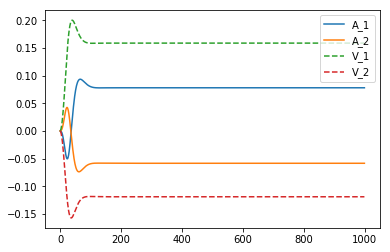

In [170]:
plt.plot(A)
plt.plot(V,'--')
plt.legend(['A_1','A_2','V_1','V_2'])